In [1]:
import kan
import torch
import torch.nn as nn
import numpy as np
from libraries import utils
from libraries import magnetization
import numpy.random as npr
import qutip as qt

In [2]:
N = 6

In [3]:
def J1J2_hamiltonian(N, j1, j2):
    id = qt.qeye(2)
    x = qt.sigmax()
    y = qt.sigmay()
    z = qt.sigmaz()
    sxi = []; syi = []; szi = []
    for i in range(N):
        sxi.append(qt.tensor([id] * i + [x] + [id] * (N - i - 1)))
        syi.append(qt.tensor([id] * i + [y] + [id] * (N - i - 1)))
        szi.append(qt.tensor([id] * i + [z] + [id] * (N - i - 1)))
    sis = [sxi, syi, szi]
    J1_term = j1 * (sum(sis[coord][i] * sis[coord][i + 1] for coord in range(len(sis)) for i in range(N - 1)) + sum(sis[coord][N - 1] * sis[coord][0] for coord in range(len(sis))))
    J2_term = j2 * (sum(sis[coord][i] * sis[coord][i + 2] for coord in range(len(sis)) for i in range(N - 2)) + sum(sis[coord][N - 2] * sis[coord][0] for coord in range(len(sis))) + sum(sis[coord][N - 1] * sis[coord][1] for coord in range(len(sis))))
    return J1_term + J2_term

In [4]:
def count_half_magnetization(state): 
    """
    Counts number of 1s in binary representation of some integer
    With integer encoding of state such that 1 in binary representation 
    is spin down and 0 is spin up. Returns number of spin downs.
    """
    if state == 0: return 0
    return sum((state >> n) & 1 for n in range(0, int(np.log2(state)) + 1, 2))

In [5]:
count_half_magnetization(0b00010111)

3

In [6]:
input = utils.generate_input_torch(N)
labels = torch.tensor([1 - 2 * (count_half_magnetization(i) % 2) for i in range(2 ** N)]).reshape((-1, 1))

In [7]:
input

tensor([[0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0.],
        [0., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 1., 0., 0.],
        [0., 1., 0., 1., 0., 0.],
        [1., 1., 0., 1., 0., 0.],
        [0., 0., 1., 1., 0., 0.],
        [1., 0., 1., 1., 0., 0.],
        [0., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 1., 0.],
        [1., 1., 0., 0., 1., 0.],
        [0., 0., 1., 0., 1., 0.],
        [1., 0., 1., 0., 1., 0.],
        [0., 1., 1., 0., 1., 0.],
        [1., 1., 1., 0., 1., 0.],
        [0., 0., 0., 1., 1., 0.],
        [1., 0., 0., 1., 1., 0.],
        [0., 1., 0., 1., 1., 0.],
        [1., 1., 0., 1., 1., 0.],
        [0., 0., 1., 1., 1., 0.],
        [1., 0

In [8]:
labels

tensor([[ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1]])

In [9]:
dataset = {'train_input': input, 'train_label': labels, 'test_input': input, 'test_label': labels}

checkpoint directory created: ./model
saving model version 0.0


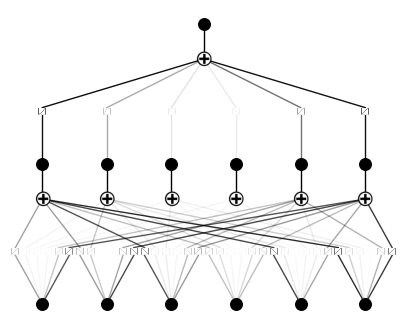

In [10]:
kan_model = kan.KAN(width = [N, N, 1])
kan_model(dataset['train_input']);
kan_model.plot()

In [11]:
kan_model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001);

| train_loss: 4.22e-03 | test_loss: 4.22e-03 | reg: 6.73e+00 | : 100%|█| 50/50 [00:05<00:00,  9.12it

saving model version 0.1


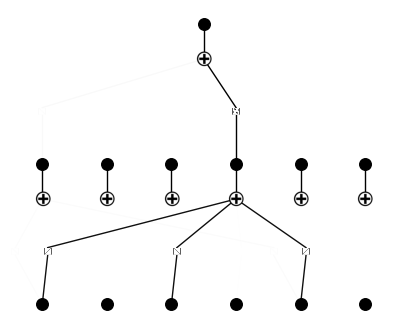

In [12]:
kan_model.plot()

(array([-0.23148023, -0.23134577, -0.23125145, -0.23121628, -0.231117  ,
        -0.23108183, -0.2309875 , -0.23085305, -0.02210359, -0.02196913,
        -0.02187482, -0.02183964, -0.02174037, -0.02170519, -0.02161088,
        -0.02147643, -0.02116907, -0.02103462, -0.02094031, -0.02090513,
        -0.02080585, -0.02077067, -0.02067636, -0.02054191, -0.01344256,
        -0.01330811, -0.01321379, -0.01317861, -0.01307934, -0.01304416,
        -0.01294985, -0.0128154 ,  0.18820755,  0.188342  ,  0.18843633,
         0.1884715 ,  0.18857078,  0.18860595,  0.18870027,  0.18883473,
         0.19593407,  0.19606853,  0.19616285,  0.19619802,  0.1962973 ,
         0.19633247,  0.1964268 ,  0.19656125,  0.19686858,  0.19700304,
         0.19709736,  0.19713253,  0.19723181,  0.19726698,  0.1973613 ,
         0.19749576,  0.40624523,  0.4063797 ,  0.406474  ,  0.40650916,
         0.40660846,  0.40664363,  0.40673792,  0.4068724 ], dtype=float32),
 array([-0.99520445, -0.9970565 , -0.99834985, 

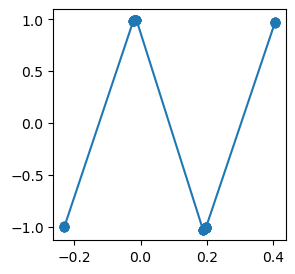

In [13]:
kan_model.get_fun(1, 3, 0)

In [14]:
kan_model.suggest_symbolic(1, 3, 0)

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        0    0.000000  0.000014           0                0    0.000003
1      tan    0.997982 -8.945999           3                3    0.610800
2        x    0.000059 -0.000071           1                1    0.799986
3      sin    0.782208 -2.198911           2                2    1.160218
4      cos    0.782171 -2.198664           2                2    1.160267


('0',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  0,
  <function kan.utils.<lambda>(x, y_th)>),
 np.float64(0.0),
 np.int64(0))

saving model version 0.2


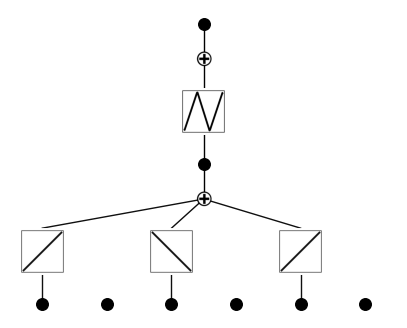

In [15]:
kan_model = kan_model.prune()
kan_model.plot()

In [16]:
kan_model.fix_symbolic(1, 0, 0, 'sin')
kan_model.fix_symbolic(0, 0, 0, 'x');
kan_model.fix_symbolic(0, 2, 0, 'x');
kan_model.fix_symbolic(0, 4, 0, 'x');

Best value at boundary.
r2 is 0.7822082042694092
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.3
Best value at boundary.
r2 is 1.0000005960464478
saving model version 0.4
r2 is 1.0000005960464478
saving model version 0.5
r2 is 1.0000005960464478
saving model version 0.6


In [17]:
kan_model.fit(dataset, opt="LBFGS", steps=50)

| train_loss: 1.88e-06 | test_loss: 1.88e-06 | reg: 0.00e+00 | : 100%|█| 50/50 [00:01<00:00, 32.45it

saving model version 0.7


{'train_loss': [array(0.02641083, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834502e-06, dtype=float32),
  array(1.8834

In [18]:
from kan.utils import ex_round

ex_round(kan_model.symbolic_formula()[0][0],4)

-1.1733*sin(28.2743*x_1 - 48.2247*x_3 + 21.9911*x_5 - 26.1531)

In [19]:
N = 10
import random

In [20]:
num_samples = 256
samples = [random.getrandbits(N) for _ in range(num_samples)]

In [21]:
sampled_input = utils.generate_input_samples(N, samples)
sampled_labels = torch.tensor([1 - 2 * (count_half_magnetization(i) % 2) for i in samples]).reshape((-1, 1))
print(sampled_input.shape, sampled_labels.shape)

torch.Size([256, 10]) torch.Size([256, 1])


In [22]:
sampled_dataset = {'train_input': sampled_input, 'train_label': sampled_labels, 'test_input': sampled_input, 'test_label': sampled_labels}
sampling_kan = kan.KAN(width = [N, N, 1])
sampling_kan(sampled_dataset['train_input']);

checkpoint directory created: ./model
saving model version 0.0


In [23]:
sampling_kan.fit(sampled_dataset, opt = 'LBFGS', steps = 50, lamb=0.001);

| train_loss: 5.01e-03 | test_loss: 5.01e-03 | reg: 1.03e+01 | : 100%|█| 50/50 [00:11<00:00,  4.27it

saving model version 0.1


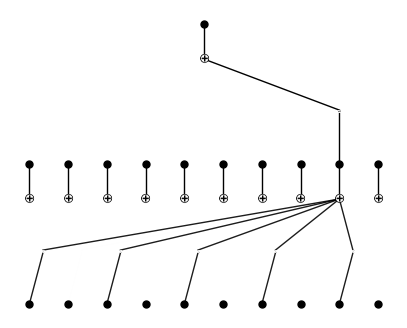

In [24]:
sampling_kan.plot()

saving model version 0.2


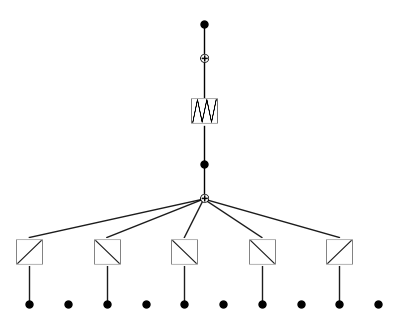

In [25]:
sampling_kan = sampling_kan.prune()
sampling_kan.plot()

In [26]:
sampling_kan.suggest_symbolic(1, 0, 0)

  function  fitting r2    r2 loss  complexity  complexity loss  total loss
0      sin    0.999989 -15.549728           2                2   -1.509946
1      cos    0.999989 -15.549728           2                2   -1.509946
2      tan    0.999830 -12.441210           3                3   -0.088242
3        0    0.000000   0.000014           0                0    0.000003
4        x    0.014147  -0.020541           1                1    0.795892


('sin',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  2,
  <function kan.utils.<lambda>(x, y_th)>),
 np.float64(0.9999891519546509),
 np.int64(2))

In [27]:
sampling_kan.fix_symbolic(1, 0, 0, 'sin')
for i in range(0, N, 2):
    sampling_kan.fix_symbolic(0, i, 0, 'x')

r2 is 0.9999891519546509
saving model version 0.3
r2 is 1.0000005960464478
saving model version 0.4
r2 is 1.0000008344650269
saving model version 0.5
r2 is 1.0000007152557373
saving model version 0.6
r2 is 1.0000007152557373
saving model version 0.7
r2 is 1.000001072883606
saving model version 0.8


In [28]:
sampling_kan.fit(sampled_dataset, opt = 'LBFGS', steps = 50);

| train_loss: 3.50e-07 | test_loss: 3.50e-07 | reg: 0.00e+00 | : 100%|█| 50/50 [00:02<00:00, 21.07it

saving model version 0.9


In [29]:
ex_round(sampling_kan.symbolic_formula()[0][0], 4)

-1.1092*sin(3.1416*x_1 - 2.2468*x_3 - 3.1416*x_5 - 3.1416*x_7 + 3.1416*x_9 + 10.5482)